# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
from PIL import Image
from skimage import data, exposure, filters, io, morphology
from skimage.exposure import histogram, equalize_hist
import cv2

# Channels and color spaces

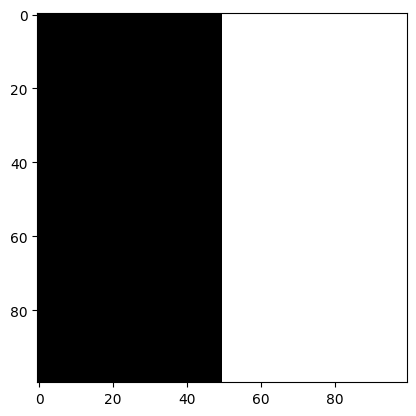

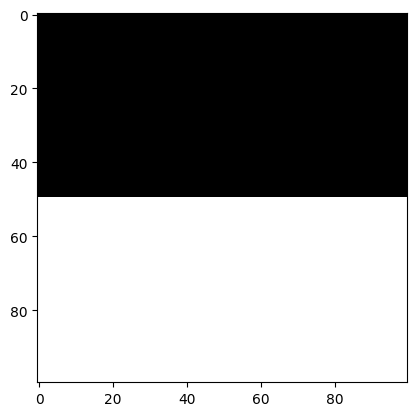

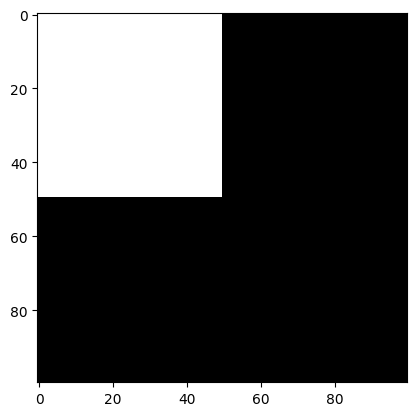

In [3]:
# solution
zeros = np.zeros((100, 100), dtype=int)

image1 = zeros.copy()
image1[:,50:] = 1
plt.imshow(image1, cmap="gray")
plt.show()

image2 = zeros.copy()
image2[50:,:]  = 1
plt.imshow(image2, cmap="gray")
plt.show()

image3 = zeros.copy()
image3[:50,:50] = 1
plt.imshow(image3, cmap="gray")
plt.show()

*   Use the above three images to create the following image

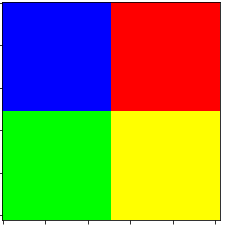
*Hint: Remember channels and color spaces*

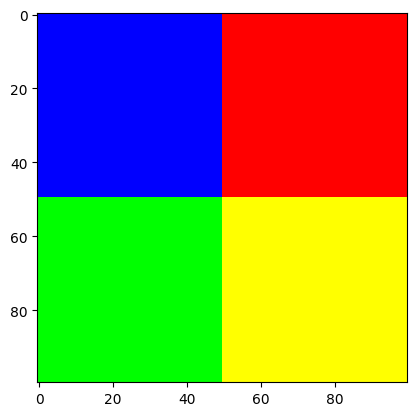

In [4]:
# solution
image4 = np.zeros((100, 100, 3), dtype=int)
image4[:50,:50,2] = 255 # Blue square
image4[:50,50:,0] = 255 # Red square
image4[50:,:50,1] = 255 # Green square
image4[50:,50:,:2] = 255 # Yellow square (red + green)

plt.imshow(image4)
plt.show()

# # Is there a way to get image4 using image1, image2 and image3? Alternative by ChatGPT:
# image4_from_combined = np.zeros((100, 100, 3), dtype=int)
# image4_from_combined[:, 50:, 0] = image1[:, 50:] * 255  # Red for the right half
# image4_from_combined[50:, :, 1] = image2[50:, :] * 255  # Green for the bottom half
# image4_from_combined[:50, :50, 2] = image3[:50, :50] * 255  # Blue for the top-left quarter
# # The bottom-right corner should be yellow, which means both red and green are set to 255.

# plt.imshow(image4_from_combined)
# plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

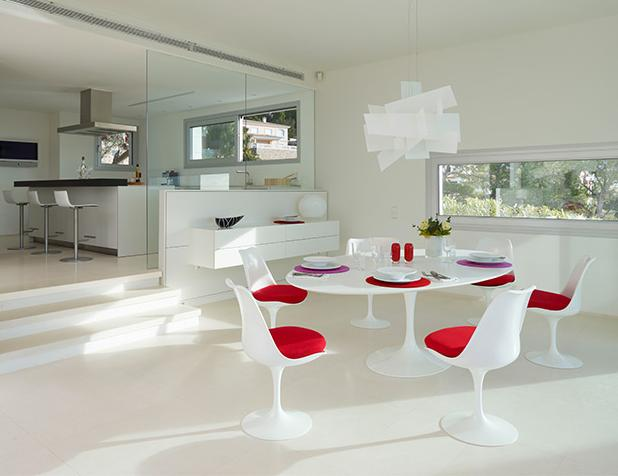

*   Extract individual channels and plot them using matplotlib subplot.



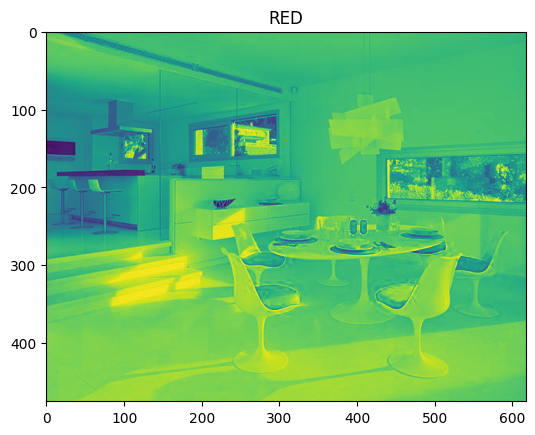

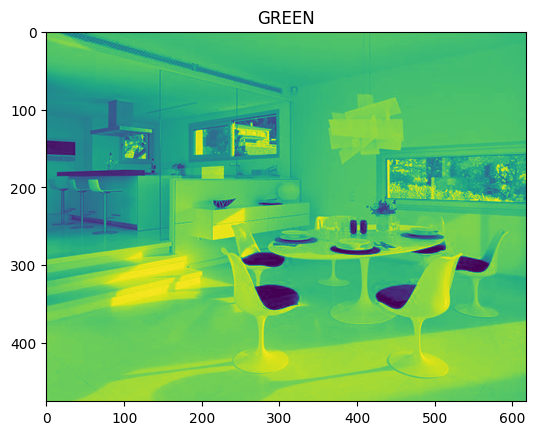

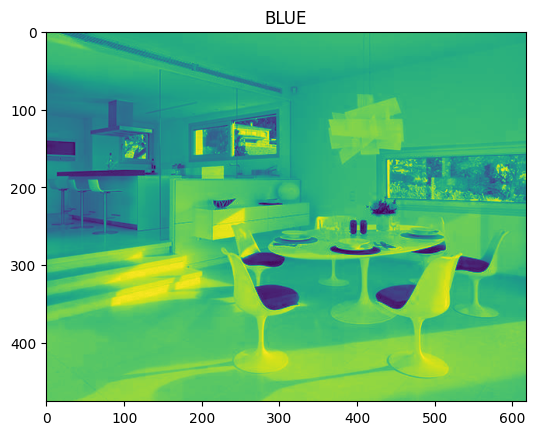

In [5]:
# solution
image = Image.open('images/sillas.jpg')

data = np.asarray(image)

plt.imshow(data[:,:,0])
plt.title("RED")
plt.show()

plt.imshow(data[:,:,1])
plt.title("GREEN")
plt.show()

plt.imshow(data[:,:,2])
plt.title("BLUE")
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

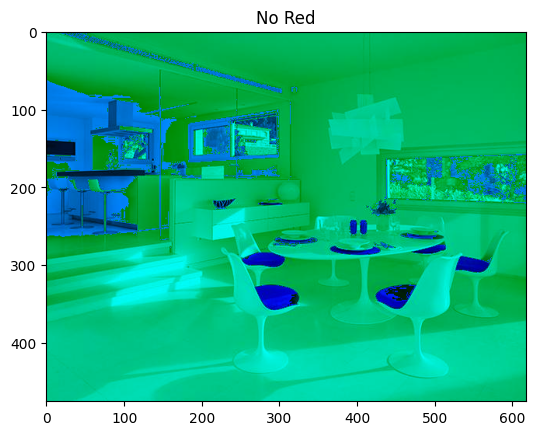

In [6]:
# solution
no_red = data.copy()
no_red[:,:,2] = no_red[:,:,2] + no_red[:,:,0] # The "amount" of red is added to the "amount" of blue
no_red[:,:,0] = 0 # The "amount" of red is set to 0

plt.imshow(no_red)
plt.title("No Red")
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

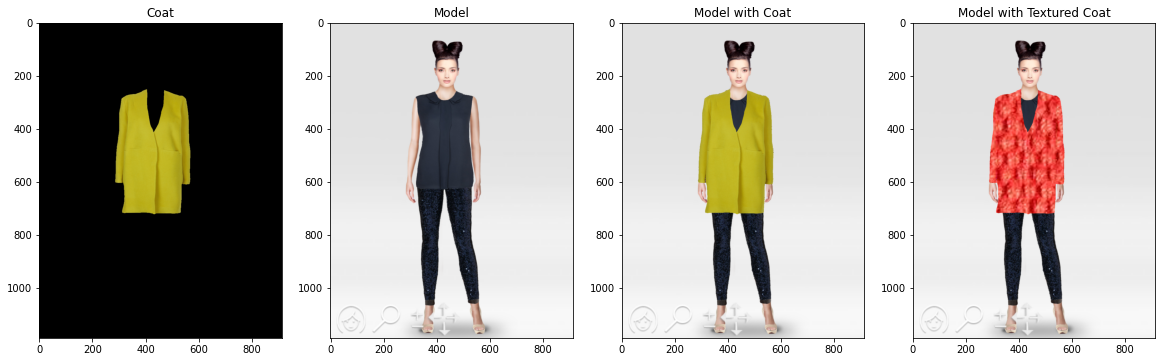

In [7]:
# Read images 
coat_image = Image.open('images/coat.png')
model_image = Image.open('images/model.png')
# texture_image = Image.open('images/texture.png')
texture_image = Image.open('images/texture2.png')
# texture_image = Image.open('images/texture3.jpg')

# Transform images into np.array
coat = np.asarray(coat_image)
model = np.asarray(model_image)
texture = np.asarray(texture_image)
texture = cv2.resize(texture, (coat.shape[1], coat.shape[0])) # Resize texture so it's the same size as coat and model for ease of future operations

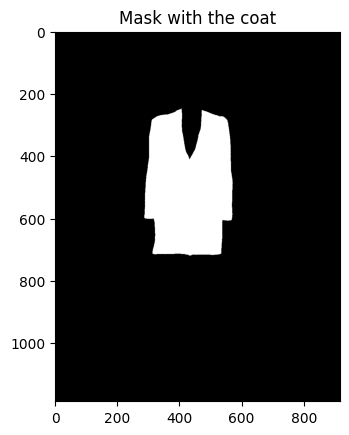

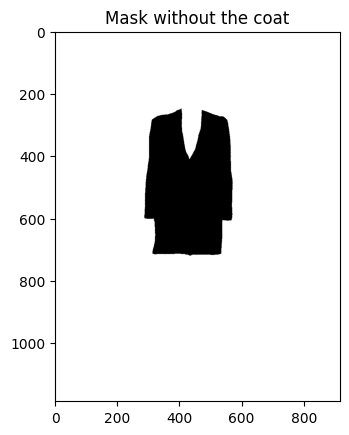

In [8]:
# Create a mask with and without the coat
gray = cv2.cvtColor(coat,cv2.COLOR_BGR2GRAY) # Turns the RGB image into a gray-scale image (only two dimensions)
_, mask_coat = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY) # Pixels with values greater than 0 are set to 1, and the rest are set to 0. To do the opposite, use cv2.THRESH_BINARY_INV
_, mask_no_coat = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY_INV) # Pixels with values greater than 0 are set to 0, and the rest are set to 1. To do the opposite, use cv2.THRESH_BINARY

plt.imshow(mask_coat,cmap='gray')
plt.title("Mask with the coat")
plt.show()

plt.imshow(mask_no_coat,cmap='gray')
plt.title("Mask without the coat")
plt.show()

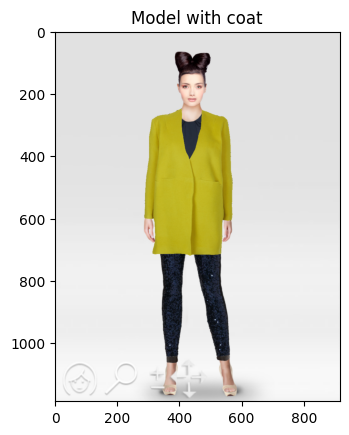

In [9]:
# Create "Model with coat"
model_with_coat = model.copy()
for channel in [0,1,2]:
    model_with_coat[:,:,channel] = model[:,:,channel]*mask_no_coat + coat[:,:,channel] # Removes the coat-area from the model and adds the original coat
plt.imshow(model_with_coat)
plt.title("Model with coat")
plt.show()

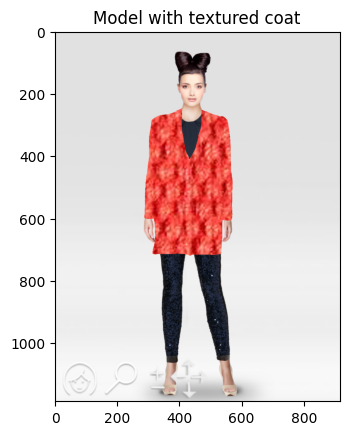

In [10]:
# Create "Model with textured coat"
model_with_textured_coat = model.copy()
for channel in [0,1,2]:
    model_with_textured_coat[:,:,channel] = model[:,:,channel]*mask_no_coat + texture[:,:,channel]*mask_coat # Removes the coat-area from the model and adds the texture in the shape of the coat
plt.imshow(model_with_textured_coat)
plt.title("Model with textured coat")
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




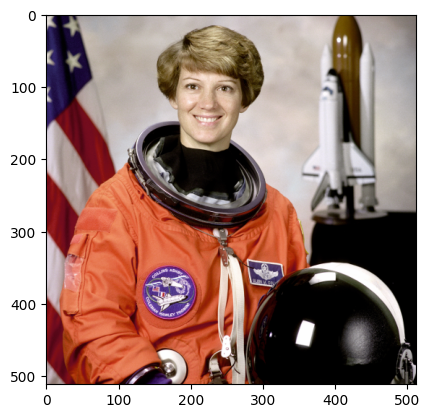

In [2]:
# Import the astronaut image
astronaut = data.astronaut()

plt.imshow(astronaut)
plt.show()

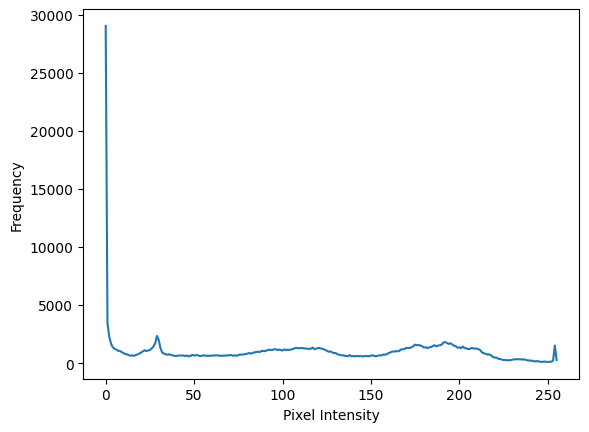

In [3]:
# Convert to gray-scale
gray = cv2.cvtColor(astronaut,cv2.COLOR_BGR2GRAY)

# Compute the histogram
hist, bin_centers = histogram(gray)

# Plot the histogram
plt.plot(bin_centers, hist)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

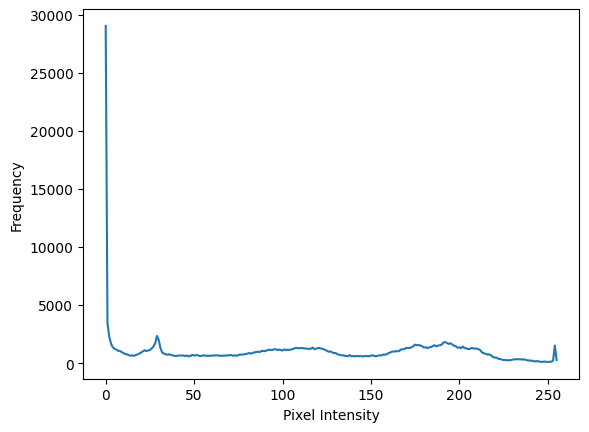

In [4]:
# Compute the histogram
hist, bin_centers = histogram(gray, nbins=8)

# Plot the histogram
plt.plot(bin_centers, hist)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Fewer bins give a broader range per bin, making the histogram less detailed.
More bins give a finer range, making the histogram more detailed.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


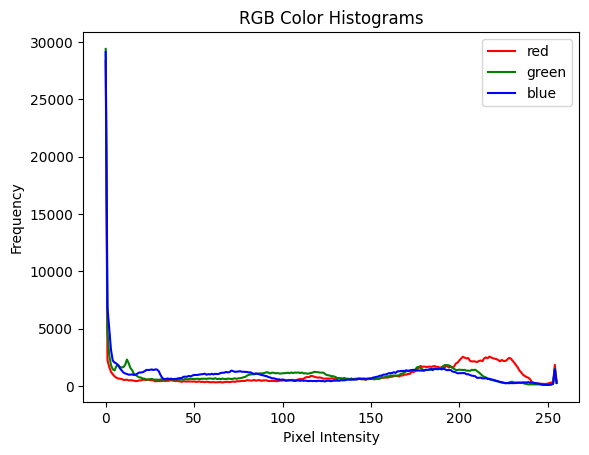

C:\Users\Saul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


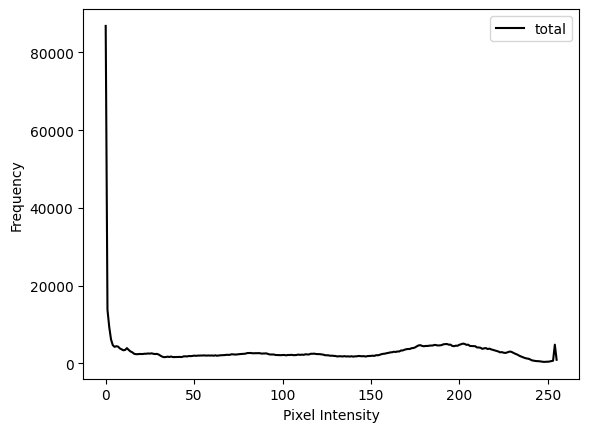

In [5]:
colors = ('red', 'green', 'blue')
for i, color in enumerate(colors):
    hist, bin_centers = histogram(astronaut[:, :, i])
    plt.plot(bin_centers, hist, color=color, label=colors[i])

plt.title("RGB Color Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

hist_total, bin_centers_total = histogram(astronaut)
plt.plot(bin_centers_total, hist_total, color="black", label="total")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



In [6]:
# Read image
aquatermi_image = Image.open('images/aquatermi_lowcontrast.jpg')

aquatermi = np.asarray(aquatermi_image)

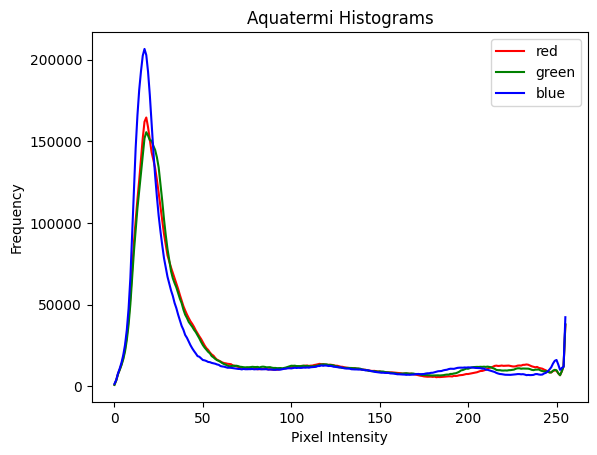

In [7]:
# Compute the histogram of the image
colors = ('red', 'green', 'blue')
for i, color in enumerate(colors):
    hist_aquatermi, bin_centers_aquatermi = histogram(aquatermi[:, :, i])
    plt.plot(bin_centers_aquatermi, hist_aquatermi, color=color, label=colors[i])

plt.title("Aquatermi Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [8]:
# Perform histogram equalization
aquatermi_eq = equalize_hist(aquatermi);

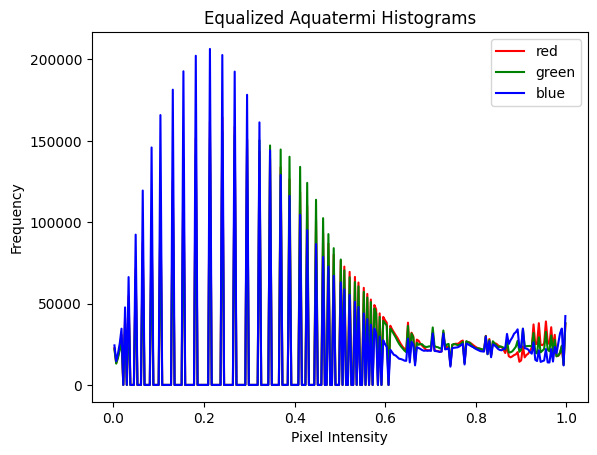

In [9]:
# Compute histogram of the equalized image
colors = ('red', 'green', 'blue')
for i, color in enumerate(colors):
    hist_aquatermi_eq, bin_centers_aquatermi_eq = histogram(aquatermi_eq[:, :, i])
    plt.plot(bin_centers_aquatermi_eq, hist_aquatermi_eq, color=color, label=colors[i])

plt.title("Equalized Aquatermi Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

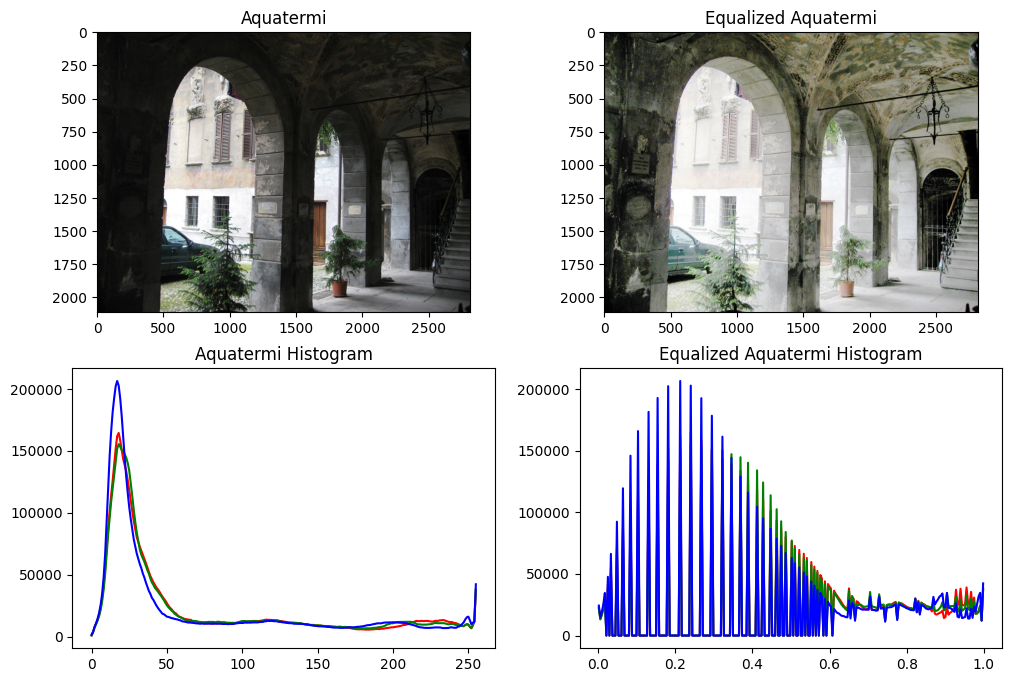

In [10]:
# Show the original image and the enhanced image along with the corresponding histograms
fig, axes = plt.subplots(2, 2, figsize=(12,8))

axes[0,0].imshow(aquatermi)
axes[0,0].set_title("Aquatermi")
for i, color in enumerate(colors):
    hist_aquatermi, bin_centers_aquatermi = histogram(aquatermi[:, :, i])
    axes[1,0].plot(bin_centers_aquatermi, hist_aquatermi, color=color, label=colors[i])
axes[1,0].set_title("Aquatermi Histogram")

axes[0,1].imshow(aquatermi_eq)
axes[0,1].set_title("Equalized Aquatermi")
for i, color in enumerate(colors):
    hist_aquatermi_eq, bin_centers_aquatermi_eq = histogram(aquatermi_eq[:, :, i])
    axes[1,1].plot(bin_centers_aquatermi_eq, hist_aquatermi_eq, color=color, label=colors[i])
axes[1,1].set_title("Equalized Aquatermi Histogram")
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**



### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



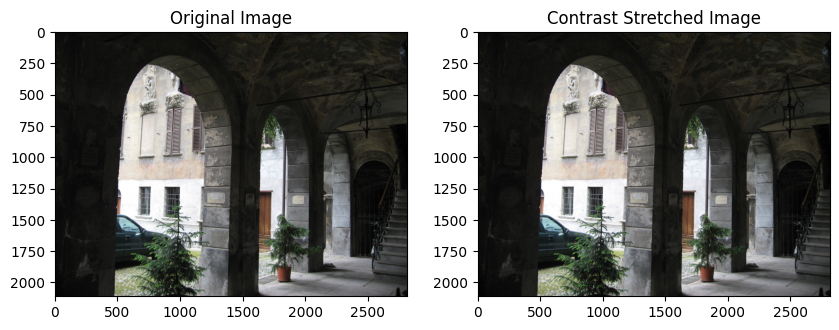

In [12]:
# solution

# Find the minimum and maximum pixel intensities in the image
I_min, I_max = aquatermi.min(), aquatermi.max()

# Define the desired output range
new_min, new_max = 0, 255

# Apply the linear contrast stretch formula
stretched_image = ((aquatermi - I_min) * ((new_max - new_min) / (I_max - I_min)) + new_min).astype(np.uint8)

# Display the original and stretched images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(aquatermi, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Contrast Stretched Image")
plt.imshow(stretched_image, cmap="gray")

plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




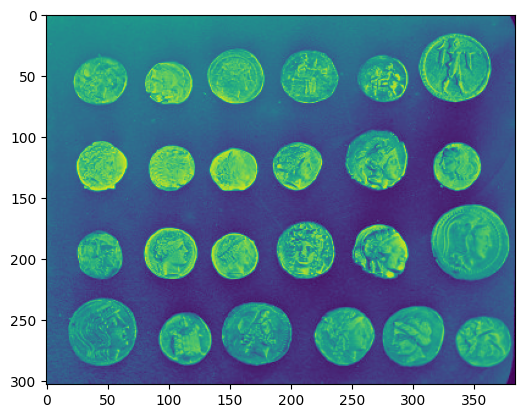

In [174]:
# Import the coins image
coins = data.coins()

plt.imshow(coins)
plt.show()

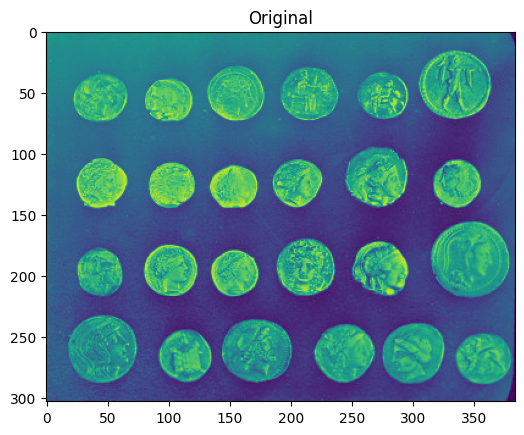

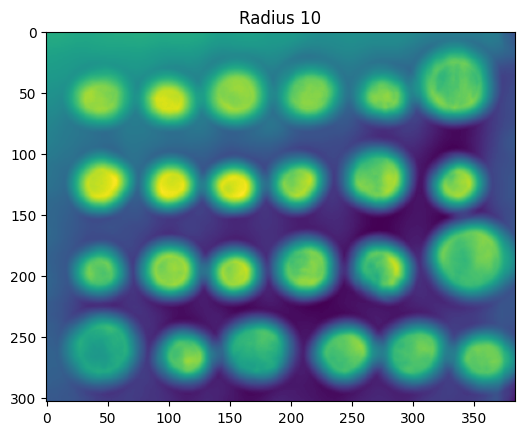

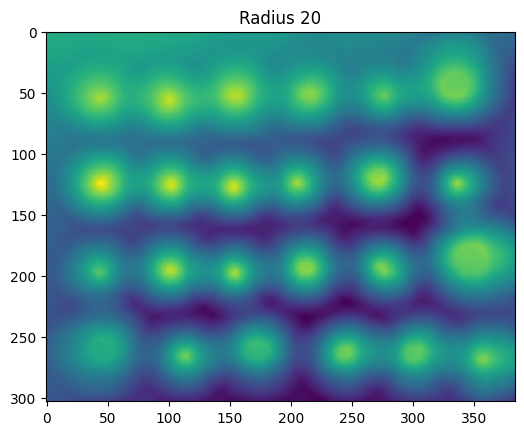

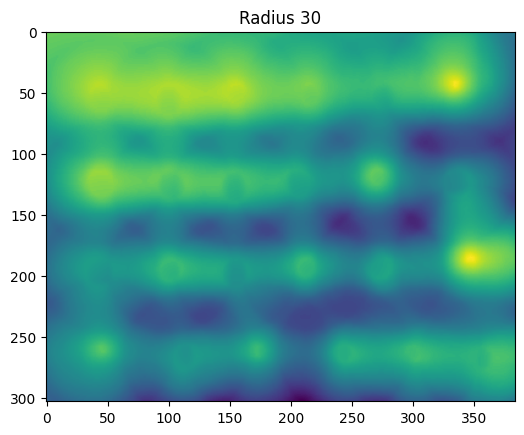

In [179]:
from skimage.morphology import disk
from skimage.filters.rank import mean

# Define a disk structuring element (selem) of radius 20
selem20 = disk(radius=20)

# Use mean filter using the created selem
filter20 = mean(image=coins, footprint=selem20)

# Increase the radius of the selem by 10 and apply the mean filter
selem30 = disk(radius=30)
filter30 = mean(image=coins, footprint=selem30)

# Reduce the radius of the selem by 10 and apply the mean filter.
selem10 = disk(radius=10)
filter10 = mean(image=coins, footprint=selem10)

# Visualize all the smoothened images along with the original image
plt.imshow(coins)
plt.title("Original")
plt.show()

plt.imshow(filter10)
plt.title("Radius 10")
plt.show()

plt.imshow(filter20)
plt.title("Radius 20")
plt.show()

plt.imshow(filter30)
plt.title("Radius 30")
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

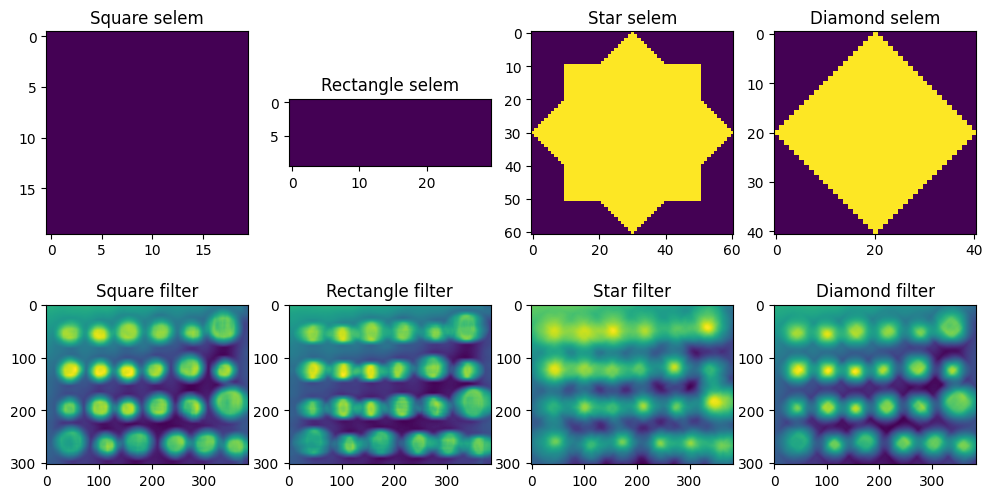

In [192]:
from skimage.morphology import square, rectangle, star, diamond

selem_square = square(width=20)
filter_square = mean(image=coins, footprint=selem_square)

selem_rectangle = rectangle(nrows=10, ncols=30)
filter_rectangle = mean(image=coins, footprint=selem_rectangle)

selem_star = star(a=20)
filter_star = mean(image=coins, footprint=selem_star)

selem_diamond = diamond(radius=20)
filter_diamond = mean(image=coins, footprint=selem_diamond)

fig, axes = plt.subplots(2, 4, figsize=(12,6))

axes[0,0].imshow(selem_square)
axes[0,0].set_title("Square selem")
axes[1,0].imshow(filter_square)
axes[1,0].set_title("Square filter")

axes[0,1].imshow(selem_rectangle)
axes[0,1].set_title("Rectangle selem")
axes[1,1].imshow(filter_rectangle)
axes[1,1].set_title("Rectangle filter")

axes[0,2].imshow(selem_star)
axes[0,2].set_title("Star selem")
axes[1,2].imshow(filter_star)
axes[1,2].set_title("Star filter")

axes[0,3].imshow(selem_diamond)
axes[0,3].set_title("Diamond selem")
axes[1,3].imshow(filter_diamond)
axes[1,3].set_title("Diamond filter")
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

It modifies the size of filter, so the filtered image is more blurry the bigger the radius


*   What is the observed behaviour with difference in the structuring element?



**Solution**

It slightly modifies the shape of the blurry image



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean filter takes the average of all pixels within the filter, while gaussian filter gives more weight to pixels in the center.
Mean filter: Simple smoothing to reduce random noise
Gaussian filter: More advanced smoothing, especially to preserve image structures like edges